In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_train.csv')
test = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_test.csv')

In [22]:
#Change the categorical data to numerical data
#Start with the Embarked column
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
train["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [23]:
test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test["Embarked"].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [24]:
train["Sex"] = train["Sex"].fillna("male")
train["Sex"] = train["Sex"].map({"male": 0, "female": 1}).astype(int)
train["Sex"].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [25]:
test["Sex"] = test["Sex"].fillna("male")
test["Sex"] = test["Sex"].map({"male": 0, "female": 1}).astype(int)
test["Sex"].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [28]:
train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [29]:
test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

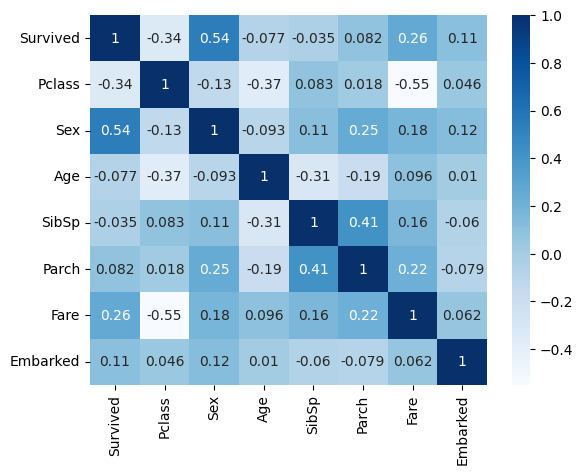

In [30]:
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

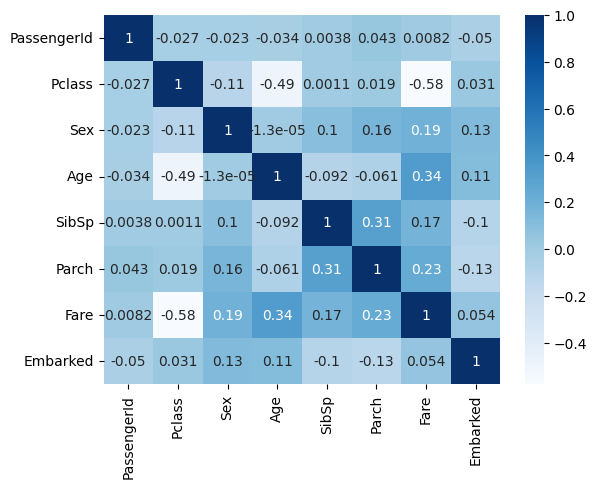

In [31]:
cor = test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [32]:
from sklearn.ensemble import HistGradientBoostingClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1)

def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

lr = HistGradientBoostingClassifier() 
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)  


In [34]:
# Creating a submission file
def make_submission(kaggle_predictions):
    path="/workspaces/AITemplate/Kaggle/Titanic/Submissions/submission1.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions

})
make_submission(kaggle_predictions)

Submission exported to /workspaces/AITemplate/Kaggle/Titanic/Submissions/submission1.csv
